In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv('patientSurvival.csv', sep=',')

In [3]:
df.drop("hospital_id", axis=1, inplace=True)
df.drop("patient_id", axis=1, inplace=True)
df.drop("encounter_id", axis=1, inplace=True)
df.drop("Unnamed: 83", axis=1, inplace=True)
df

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,Floor,92,admit,CTICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,0,Caucasian,M,177.8,Floor,927,admit,Cardiac ICU,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,56.0,47.179671,0,Caucasian,F,183.0,Floor,925,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,908,admit,Med-Surg ICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,922,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [ ]:
df[['icu_admit_source', 'apache_2_bodysystem']][:10]

## Encoding

In [4]:
def encode_df(df):
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtypes == np.object:
            df[column] = le.fit_transform(df[column])
    return df

In [5]:
df = encode_df(df)
df

<ipython-input-4-153360a2d09c>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtypes == np.object:


,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,2,1,180.3,1,92,0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0,0
1,77.0,27.420000,0,2,0,160.0,1,90,0,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6,0
2,25.0,31.950000,0,2,0,172.7,0,93,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,0
3,81.0,22.640000,1,2,0,165.1,2,92,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,19.0,NaN,0,2,1,188.0,0,91,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,0,2,1,177.8,1,927,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9,0,0
91709,56.0,47.179671,0,2,0,183.0,1,925,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0,0
91710,48.0,27.236914,0,2,1,170.2,0,908,0,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,3,0
91711,NaN,23.297481,0,2,0,154.9,0,922,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6,0


In [6]:
df[['icu_admit_source', 'apache_2_bodysystem']][:10]

,icu_admit_source,apache_2_bodysystem
0,1,0
1,1,6
2,0,3
3,2,0
4,0,7
5,0,4
6,0,6
7,0,0
8,3,0
9,0,0


## Filling the Null Values

In [14]:
print("# of missing values:", df.isnull().any(axis = 1).sum())

# of missing values: 34115


In [6]:
def full_null(col_name):
    
    # riskli hastalar için
    df_1 = df[df['hospital_death'] == 1]
    
    df_bmi_1_avg = df_1[col_name].mean()
    df_bmi_1_avg
    
    df_1[col_name] = df_1[col_name].apply(lambda x: df_bmi_1_avg if pd.isna(x) else x)
    
    # riskli hastalar için
    df_0 = df[df['hospital_death'] == 0]
    
    df_bmi_0_avg = df_0[col_name].mean()
    df_bmi_0_avg
    
    df_0[col_name] = df_0[col_name].apply(lambda x: df_bmi_0_avg if pd.isna(x) else x)
    
    # concatenate
    frames = [df_0[col_name], df_1[col_name]]
    df_col = pd.concat(frames)
    return df_col

## Correlation

In [ ]:
cols = df.columns
for i in range(len(cols)):
    column_1 = df[cols[i]]
    column_2 = df["hospital_death"]
    correlation = column_1.corr(column_2)
    print(cols[i] , ": " , correlation)

## Correlation Visualization

In [14]:
cols = df.columns
new_cols = []
correlations = []
for i in range(len(cols)):
    column_1 = df[cols[i]]
    column_2 = df["hospital_death"]
    correlation = column_1.corr(column_2)
    if abs(correlation) >= 0.1:
        new_cols.append(cols[i])
        correlations.append(correlation)
        print(cols[i] , ": " , correlation)

age :  0.1155525599775547
gcs_eyes_apache :  -0.26532108104557506
gcs_motor_apache :  -0.28774612998814275
gcs_verbal_apache :  -0.24567412234066036
heart_rate_apache :  0.10851949080246123
intubated_apache :  0.17402430067718594
temp_apache :  -0.1641904035984855
ventilated_apache :  0.2298030921501028
d1_diasbp_min :  -0.17988287672834172
d1_diasbp_noninvasive_min :  -0.18097548793380838
d1_heartrate_max :  0.16312755147478145
d1_mbp_min :  -0.19559585367920745
d1_mbp_noninvasive_min :  -0.19702389209840268
d1_resprate_max :  0.1033767992240888
d1_spo2_min :  -0.21071183519552555
d1_sysbp_min :  -0.21054364101919779
d1_sysbp_noninvasive_min :  -0.21128480066481978
d1_temp_min :  -0.21119660485877434
h1_diasbp_min :  -0.12719776159228943
h1_diasbp_noninvasive_min :  -0.13615546025736408
h1_heartrate_max :  0.11511538880801235
h1_mbp_min :  -0.1448099524325354
h1_mbp_noninvasive_min :  -0.15388436986807597
h1_resprate_max :  0.12461831170982793
h1_resprate_min :  0.11317045879511088
h1

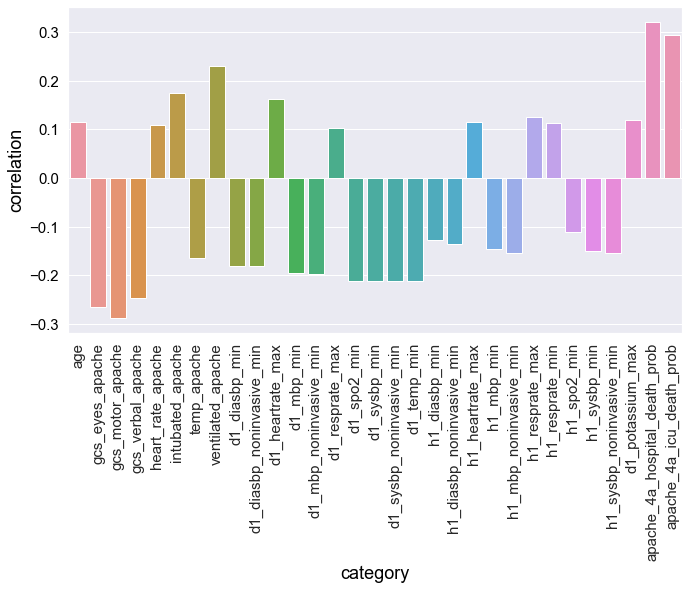

In [17]:
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc = {'figure.figsize':(11,6)})
sns.barplot(x=df[new_cols[:-1]].columns, y=correlations[:-1])

plt.xticks(np.arange(len(correlations[:-1])), df[new_cols[:-1]].columns, rotation=90, fontsize='15')
plt.yticks(color='black', fontsize='15')

plt.xlabel('category', color = 'black', fontsize='18')
plt.ylabel('correlation', color = 'black', fontsize='18')

plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


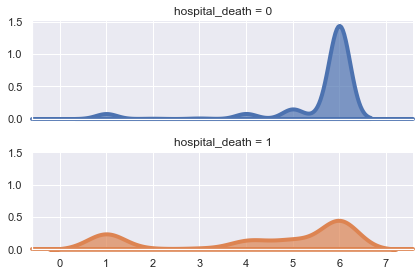

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
  
  
rp = sns.FacetGrid(df, row="hospital_death", hue="hospital_death", aspect=3, height=2)

col = 'gcs_motor_apache'
#col = 'apache_4a_icu_death_prob'
#col = 'apache_4a_hospital_death_prob'
rp.map(sns.kdeplot, col, clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=0.2)
  
rp.map(plt.axhline, y=0, lw=4, clip_on=False)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
st_df = {}
st = scaler.fit_transform(df)
pd.DataFrame(st)
i=0
for col in df.columns:
    st_df[col] = st[:,i]
    i+=1
pd.DataFrame(st_df)

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,0.345840,-0.795052,-0.474441,-0.038732,0.922069,0.994632,0.315614,-1.818248,-0.249974,-1.269966,...,-0.126795,1.862187,-0.115203,-0.164597,-0.084716,-0.064683,-0.145778,1.195744,-0.903720,-0.307333
1,0.894877,-0.217402,-0.474441,-0.038732,-1.082143,-0.899632,0.315614,-1.826982,-0.249974,0.395956,...,-0.126795,1.862187,-0.115203,-0.164597,-0.084716,-0.064683,-0.145778,0.937589,1.142905,-0.307333
2,-2.277339,0.340540,-0.474441,-0.038732,-1.082143,0.285449,-0.732924,-1.813881,-0.249974,0.395956,...,-0.126795,-0.541211,-0.115203,-0.164597,-0.084716,-0.064683,-0.145778,0.163124,0.119593,-0.307333
3,1.138894,-0.806137,2.107744,-0.038732,-1.082143,-0.423733,1.364153,-1.818248,-0.249974,-1.269966,...,-0.126795,-0.541211,-0.115203,-0.164597,-0.084716,-0.064683,-0.145778,-1.127651,-0.903720,-0.307333
4,-2.643364,0.009827,-0.474441,-0.038732,0.922069,1.713145,-0.732924,-1.822615,-0.249974,0.395956,...,-0.126795,-0.541211,-0.115203,-0.164597,-0.084716,-0.064683,-0.145778,1.453899,1.484009,-0.307333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0.772869,-0.754376,-0.474441,-0.038732,0.922069,0.761348,0.315614,1.828225,-0.249974,-0.714659,...,-0.126795,1.862187,-0.115203,-0.164597,-0.084716,-0.064683,6.915608,1.195744,-0.903720,-0.307333
91709,-0.386210,2.216320,-0.474441,-0.038732,-1.082143,1.246578,0.315614,1.819491,-0.249974,0.395956,...,-0.126795,-0.541211,-0.115203,-0.164597,-0.084716,-0.064683,-0.145778,1.195744,-0.903720,-0.307333
91710,-0.874243,-0.239953,-0.474441,-0.038732,0.922069,0.052166,-0.732924,1.745251,-0.249974,0.395956,...,-0.126795,1.862187,-0.115203,-0.164597,-0.084716,-0.064683,-0.145778,0.163124,0.119593,-0.307333
91711,-0.035513,-0.725157,-0.474441,-0.038732,-1.082143,-1.375530,-0.732924,1.806390,-0.249974,0.395956,...,-0.126795,-0.541211,-0.115203,-0.164597,-0.084716,-0.064683,-0.145778,0.937589,1.142905,-0.307333


In [56]:
np.unique(st_df['hospital_death'])

array([-0.3073326 ,  3.25380384])

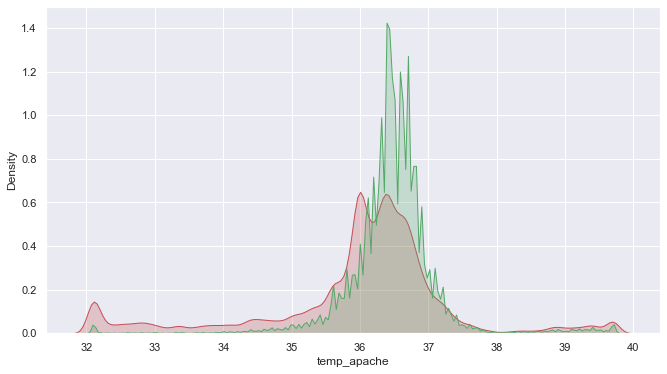

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
 
fig = sns.kdeplot(data=df[df['hospital_death']==1]['temp_apache'], shade=True, color="r", bw_adjust=.4)
fig = sns.kdeplot(data=df[df['hospital_death']==0]['temp_apache'], shade=True, color="g", bw_adjust=.4)
plt.show()

# red-> death
# green -> not death

In [ ]:
cols = df.columns
for col in cols:
    print(col, ": ", len(np.unique(df[col])))

In [20]:
hr_0 = df[df['hospital_death']==0]['d1_heartrate_max'].mean()
hr_1 = df[df['hospital_death']==1]['d1_heartrate_max'].mean()

r_0 = df[df['hospital_death']==0]['d1_resprate_max'].mean()
r_1 = df[df['hospital_death']==1]['d1_resprate_max'].mean()

mbp_0 = df[df['hospital_death']==0]['d1_mbp_max'].mean()
mbp_1 = df[df['hospital_death']==1]['d1_mbp_max'].mean()

bmi_0 = df[df['hospital_death']==0]['bmi'].mean()
bmi_1 = df[df['hospital_death']==1]['bmi'].mean()

glu_0 = df[df['hospital_death']==0]['d1_glucose_max'].mean()
glu_1 = df[df['hospital_death']==1]['d1_glucose_max'].mean()

sample = {'bmi': [bmi_0, bmi_1],
         'max_heartrate': [hr_0, hr_1],
         'max_resprate': [r_0, r_1],
         'blood_pressure': [mbp_0, mbp_1],
         'glu': [glu_0, glu_1],
         'death': ['0', '1']}
sample = pd.DataFrame(sample)
sample

,bmi,max_heartrate,max_resprate,blood_pressure,glu,death
0,29.264902,101.898629,28.543974,104.758393,172.458791,0
1,28.340398,114.679164,32.475604,103.516358,197.580784,1


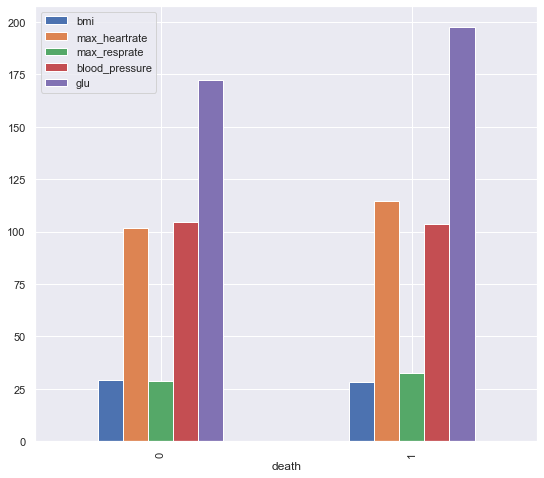

In [21]:
sample.plot(x='death', y=["bmi", "max_heartrate", "max_resprate", "blood_pressure", "glu"], 
            kind="bar", figsize=(9, 8))
plt.show()

In [ ]:
df.to_csv('clear_df.csv', sep='\t')